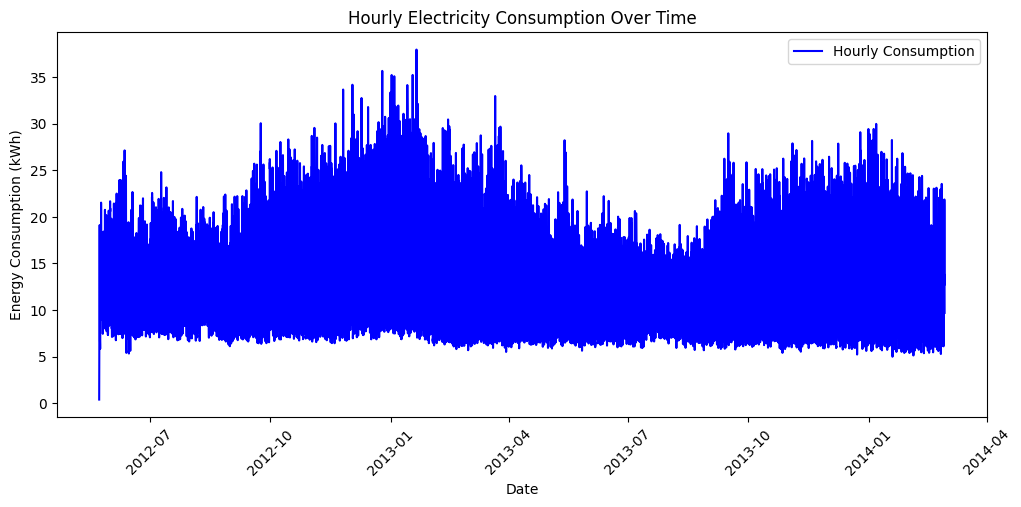

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load hourly energy data
df_hourly = pd.read_csv("hourly_energy_data.csv", parse_dates=["DateTime"])

# Sort by DateTime
df_hourly = df_hourly.sort_values(by="DateTime")

# Plot to visualize consumption
plt.figure(figsize=(12, 5))
plt.plot(df_hourly["DateTime"], df_hourly["Total_Hourly_Consumption"], label="Hourly Consumption", color="blue")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Hourly Electricity Consumption Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


/Users/anurag/Documents/EnergyGPT/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


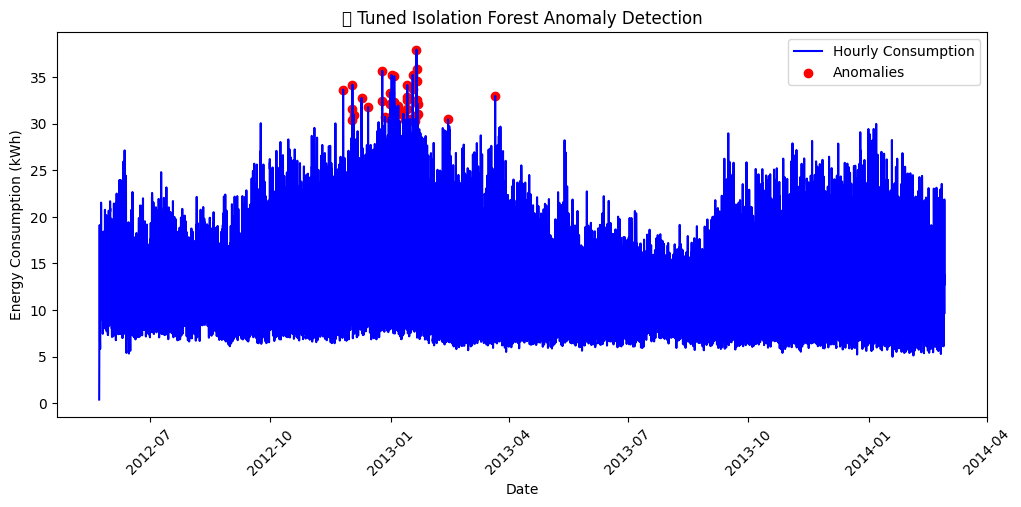

In [3]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df_hourly = pd.read_csv("/Users/anurag/Documents/EnergyGPT/data/processed/hourly_energy_data.csv", parse_dates=["DateTime"])
df_hourly = df_hourly.sort_values(by="DateTime")

# Tune Isolation Forest Parameters
iso_forest = IsolationForest(
    contamination=0.003,  # Reduced contamination rate for fewer false positives
    n_estimators=200,  # More trees for better decision boundary
    max_samples="auto",
    random_state=42
)

# Fit Model
df_hourly["anomaly"] = iso_forest.fit_predict(df_hourly[["Total_Hourly_Consumption"]])

# Extract Anomalies
df_anomalies = df_hourly[df_hourly["anomaly"] == -1]

# 📊 **Plot Refined Anomalies**
plt.figure(figsize=(12, 5))
plt.plot(df_hourly["DateTime"], df_hourly["Total_Hourly_Consumption"], label="Hourly Consumption", color="blue")
plt.scatter(df_anomalies["DateTime"], df_anomalies["Total_Hourly_Consumption"], color="red", label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("🔥 Tuned Isolation Forest Anomaly Detection")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Save Refined Anomaly Data
df_hourly.to_csv("/Users/anurag/Documents/EnergyGPT/data/processed/refined_anomaly_data.csv", index=False)


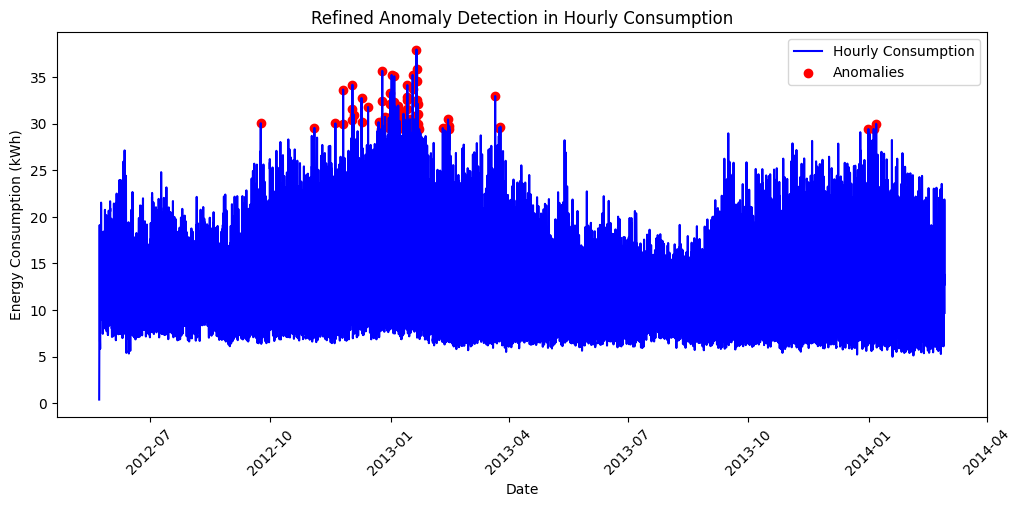

In [5]:
# Experiment with different contamination rates
iso_forest = IsolationForest(contamination=0.005, random_state=42)
df_hourly["anomaly"] = iso_forest.fit_predict(df_hourly[["Total_Hourly_Consumption"]])

# Update anomaly visualization
df_anomalies = df_hourly[df_hourly["anomaly"] == -1]

plt.figure(figsize=(12, 5))
plt.plot(df_hourly["DateTime"], df_hourly["Total_Hourly_Consumption"], label="Hourly Consumption", color="blue")
plt.scatter(df_anomalies["DateTime"], df_anomalies["Total_Hourly_Consumption"], color="red", label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Refined Anomaly Detection in Hourly Consumption")
plt.legend()
plt.xticks(rotation=45)
plt.show()


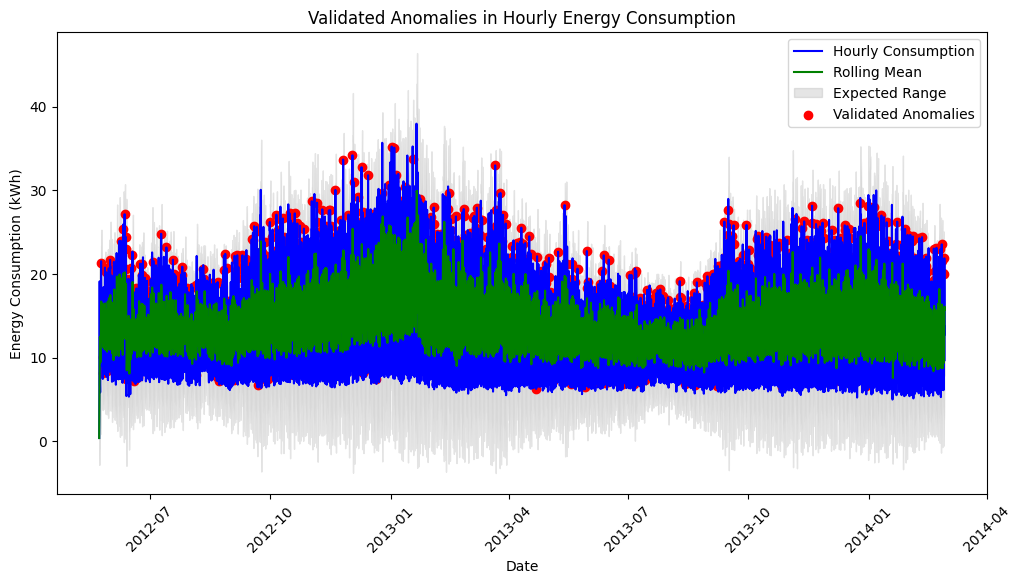

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df_hourly = pd.read_csv("hourly_energy_data.csv", parse_dates=["DateTime"])

# Compute rolling mean and std
df_hourly["rolling_mean"] = df_hourly["Total_Hourly_Consumption"].rolling(window=12, min_periods=1).mean()
df_hourly["rolling_std"] = df_hourly["Total_Hourly_Consumption"].rolling(window=12, min_periods=1).std()

# Adjust the anomaly threshold (2 standard deviations instead of 3)
df_hourly["upper_bound"] = df_hourly["rolling_mean"] + (2 * df_hourly["rolling_std"])
df_hourly["lower_bound"] = df_hourly["rolling_mean"] - (2 * df_hourly["rolling_std"])

# Detect anomalies
df_hourly["validated_anomaly"] = (df_hourly["Total_Hourly_Consumption"] > df_hourly["upper_bound"]) | \
                                 (df_hourly["Total_Hourly_Consumption"] < df_hourly["lower_bound"])

# Filter out anomalies
df_anomalies = df_hourly[df_hourly["validated_anomaly"]]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_hourly["DateTime"], df_hourly["Total_Hourly_Consumption"], label="Hourly Consumption", color="blue")
plt.plot(df_hourly["DateTime"], df_hourly["rolling_mean"], label="Rolling Mean", color="green")
plt.fill_between(df_hourly["DateTime"], df_hourly["lower_bound"], df_hourly["upper_bound"], 
                 color='gray', alpha=0.2, label="Expected Range")
plt.scatter(df_anomalies["DateTime"], df_anomalies["Total_Hourly_Consumption"], 
            color="red", label="Validated Anomalies")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Validated Anomalies in Hourly Energy Consumption")
plt.legend()
plt.xticks(rotation=45)
plt.show()


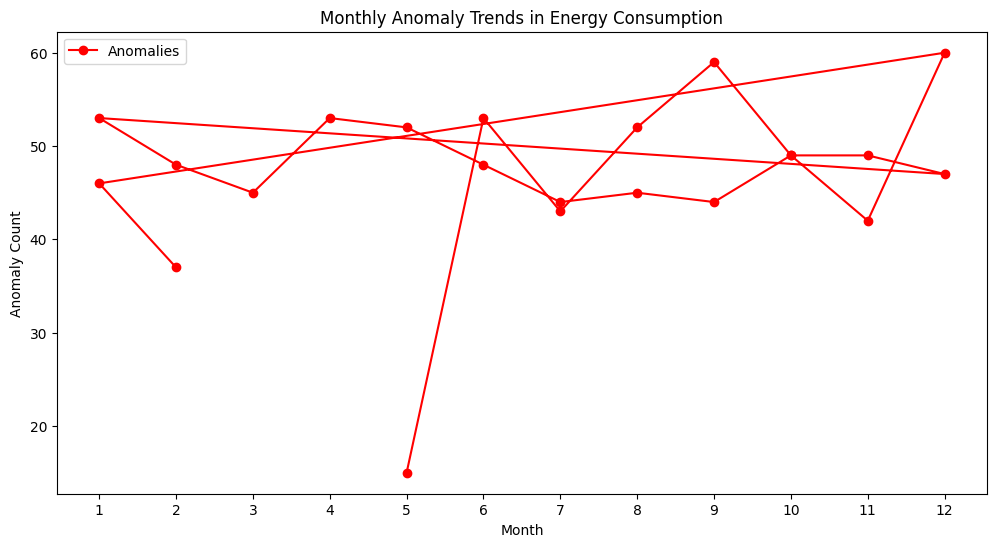

In [10]:
# Extract Year & Month
df_hourly["Month"] = df_hourly["DateTime"].dt.month
df_hourly["Year"] = df_hourly["DateTime"].dt.year

# Count anomalies per month
anomaly_counts = df_hourly[df_hourly["validated_anomaly"]].groupby(["Year", "Month"]).size().reset_index(name="Anomaly_Count")

# Plot Anomaly Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(anomaly_counts["Month"], anomaly_counts["Anomaly_Count"], marker="o", linestyle="-", color="red", label="Anomalies")
plt.xlabel("Month")
plt.ylabel("Anomaly Count")
plt.title("Monthly Anomaly Trends in Energy Consumption")
plt.xticks(range(1, 13))
plt.legend()
plt.show()
